Failed to get ticker 'SPY' reason: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SPY']: YFTzMissingError('possibly delisted; no timezone found')


Empty DataFrame
Columns: [SPY]
Index: []


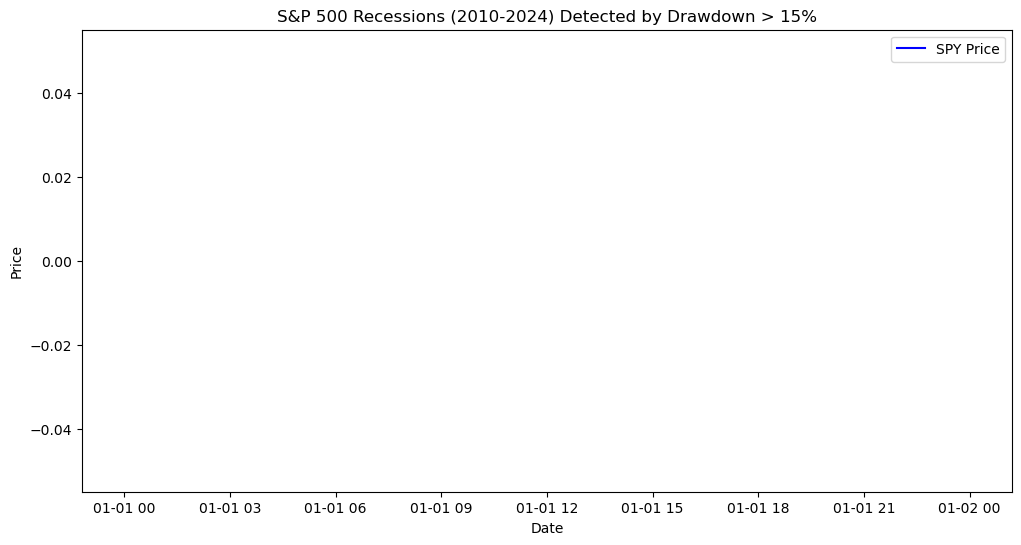

In [ ]:
### Looking at different bias

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


ticker = "LMT"
# recession_periods = [("2020-02-19", "20#20-06-30"), ("2007-12-01", "2009-06-30")]

stock_data = yf.download(ticker, start="2007-01-01", end="2021-01-01", auto_adjust=False)["Adj Close"]

rolling_max = stock_data.cummax()
print(rolling_max)
drawdown = (stock_data - rolling_max)/ rolling_max * 100.0

threshold = -20
recession_periods = drawdown[drawdown < threshold].index

recession_ranges = []
if not recession_periods.empty:
    start = recession_periods[0]
    for i in range(1, len(recession_periods)):
        if (recession_periods[i] - recession_periods[i - 1]).days > 10:
            recession_ranges.append((start, recession_periods[i - 1]))
            start = recession_periods[i]
    recession_ranges.append((start, recession_periods[-1]))

plt.figure(figsize=(12, 6))
plt.plot(stock_data, label="SPY Price", color="blue")

for start, end in recession_ranges:
    plt.axvspan(start, end, color="red", alpha=0.3)  # Highlight recession periods

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("S&P 500 Recessions (2010-2024) Detected by Drawdown > 15%")
plt.legend()
plt.show()

# drawdowns = []
# for start, end in recession_periods:
#     recession_prices = stock_data.loc[start:end]
#     print(recession_prices)
#     peak = recession_prices.iloc[0]
#     trough = recession_prices.min()
#     drawdown = (trough - peak) / peak
#     drawdowns.append(drawdown * 100)

# drawdowns = np.array(drawdowns)

# percentiles = {
#     "Worst-Case (25th)": np.percentile(drawdowns, 25),
#     "Median (50th)": np.percentile(drawdowns, 50),
#     "Optimistic (75th)": np.percentile(drawdowns, 75)
# }

# bias level 
# bias_level = "Worst-Case (25th)"

# print(f"\nHistorical Recession Drawdowns for {ticker}: {drawdowns}%")
# print(f"\nSelected Bias Level: {bias_level}")
# print(f"Expected Drawdown: {percentiles[bias_level]:.2f}%")

# # Plotting Recession Drawdowns
# plt.figure(figsize=(8, 5))
# plt.hist(drawdowns, bins=5, color="blue", alpha=0.7, edgecolor="black")
# plt.axvline(percentiles[bias_level], color="red", linestyle="dashed", label=f"{bias_level} = {percentiles[bias_level]:.2f}%")
# plt.xlabel("Drawdown % During Recession")
# plt.ylabel("Frequency")
# plt.title(f"Recession Downside Analysis for {ticker}")
# plt.legend()
# plt.show()

151093.95


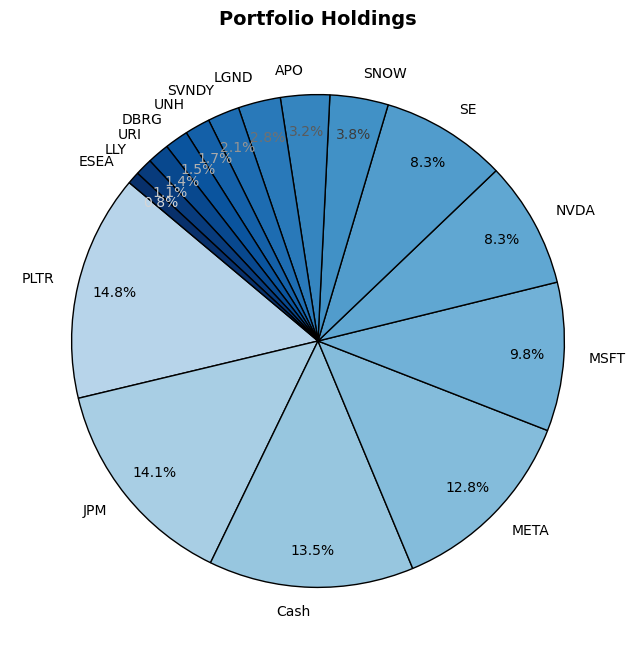

In [14]:
import matplotlib.pyplot as plt
import numpy as np 

# Stock tickers and corresponding market values
portfolio = {
    'MSFT': 14747.04,
    'JPM': 21276.20,
    'META': 19341.99,
    'NVDA': 12546.00,
    'LLY': 1714.40,
    'DBRG': 2333.25,
    'UNH': 2503.65,
    'SVNDY': 3158.00,
    'SNOW': 5783.40,
    'ESEA': 1215.55,
    'LGND': 4199.65,
    'APO': 4861.80,
    'SE': 12475.80,
    'URI': 2161.05,
    'PLTR': 22431.60,
    'Cash': 20344.57
}

# Calculate total portfolio value
total_portfolio_value = sum(portfolio.values())
print(total_portfolio_value)

# Calculate percentage allocation for each stock
portfolio_percentages = {ticker: (value / total_portfolio_value) * 100 for ticker, value in portfolio.items()}

sorted_portfolio = dict(sorted(portfolio_percentages.items(), key=lambda item: item[1], reverse=True))

# Extract tickers and percentages for plotting
tickers = list(sorted_portfolio.keys())
percentages = list(sorted_portfolio.values())

# Create pie chart
plt.figure(figsize=(10, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(tickers)))  # Blue gradient from dark (largest) to light (smallest)
wedges, texts, autotexts = plt.pie(
    percentages, labels=tickers, autopct='%1.1f%%', startangle=140, colors=colors,
    wedgeprops={'edgecolor': 'black'}, pctdistance=0.85, textprops={'fontsize': 10}
)

for i, percentage in enumerate(percentages):
    fade_factor = min(percentage / 5, 1)  # Scale fade from dark (large percentages) to light (small ones)
    text_color = (1 - fade_factor, 1 - fade_factor, 1 - fade_factor)  # Smooth transition to white
    autotexts[i].set_color(text_color)
    autotexts[i].set_text(f'{percentage:.1f}%')  # Set text inside the pie

# Improve aesthetics
plt.title("Portfolio Holdings", fontsize=14, fontweight='bold')
plt.gca().set_aspect('equal')  # Ensures pie chart is circular

# Display the chart
plt.show()
